# Complex Numbers

It turns out to be mathematically convenient to deal with communications signals in their "baseband" representation.  We will get more into the details of what "baseband" means in a later module.  But many manipulations of baseband signals require familiarity with complex numbers and functions.  Let's define the following complex numbers:

- $z_0 = -3-j3$
- $z_1 = 4-j3$
- $z_2 = 2+j5$
- $z_3 = 0 + j3$
- $z_4 = -5 + j0$

$$\int_0^1 x dx = 0.5$$


In [23]:
!pip install matplotlib

You are using pip version 8.1.1, however version 8.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
# generic imports
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = (9.0, 5.0)

In [2]:
# import complex math module
import cmath

### Step 1: Define complex numbers

In [3]:
z = 1+1j
print z

(1+1j)


In [4]:
# make a list of complex numbers
z = []
z += [-3-3j]
z += [4-3j]
z += [2+5j]
z += [0+3j]
z += [-5+0j]

for ix,complex_number in enumerate(z):
    print 'z',ix, complex_number

z 0 (-3-3j)
z 1 (4-3j)
z 2 (2+5j)
z 3 3j
z 4 (-5+0j)


### Step 2: Plot complex numbers
Experiment with the various ways to annotate the plot by un commenting each plt.text line one at a time.

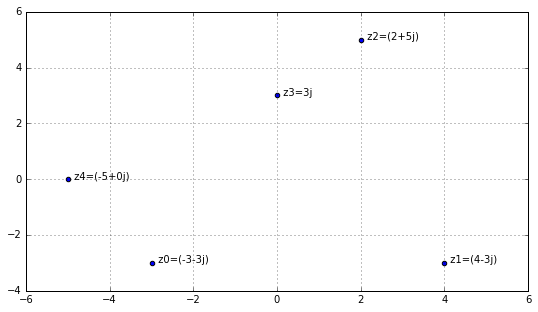

In [9]:
for ix,cn in enumerate(z):
    plt.scatter(cn.real,cn.imag)
#     plt.text(cn.real,cn.imag,ix)
#     plt.text(cn.real,cn.imag,'z'+str(ix))
    plt.text(cn.real,cn.imag,'  z'+str(ix)+"="+str(cn))
plt.grid(True)

### Step 3: Add a line to the plot from the orgin to make show the complex numbers as vectors.

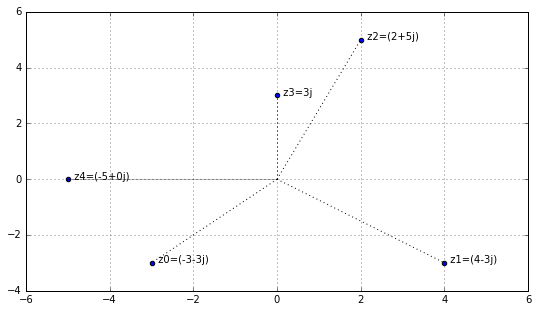

In [10]:
for ix,cn in enumerate(z):
    plt.plot([0,cn.real],[0,cn.imag],'k:')
    plt.scatter(cn.real,cn.imag)
    plt.text(cn.real,cn.imag,'  z'+str(ix)+"="+str(cn))
plt.grid(True)

### Step 5: Complex Addition

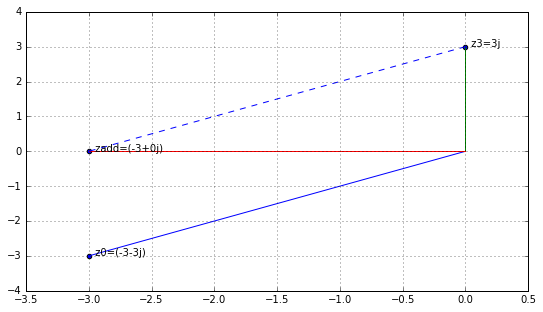

In [11]:

def plot_complex(cn,ix):
    '''
    plots complex numbers a vectors.
    
    cn = complex number to be plotted
    ix = text annotation for plot
    '''
    plt.plot([0,cn.real],[0,cn.imag])
    plt.scatter(cn.real,cn.imag)
    plt.text(cn.real,cn.imag,'  z'+str(ix)+"="+str(cn))
    
z_add = z[0]+z[3]

for ix in [0,3]:
    cn = z[ix]
    plot_complex(cn,ix)
plt.grid(True)

plot_complex(z_add,'add')

# plt.plot([-3,z_add.real],[-3,z_add.imag],color='g',ls='--')
plt.plot([0,z_add.real],[3,z_add.imag],color='b',ls='--');

### Step 6: Analyze number in Polar Form

In [12]:
for ix,cn in enumerate(z):
#     print 'z',ix, cn,'polar: ',cmath.polar(cn)
    print 'z',ix, cn,'polar: ',(abs(cn),cmath.phase(cn)/cmath.pi)

z 0 (-3-3j) polar:  (4.242640687119285, -0.75)
z 1 (4-3j) polar:  (5.0, -0.20483276469913345)
z 2 (2+5j) polar:  (5.385164807134504, 0.3788810584091566)
z 3 3j polar:  (3.0, 0.5)
z 4 (-5+0j) polar:  (5.0, 1.0)


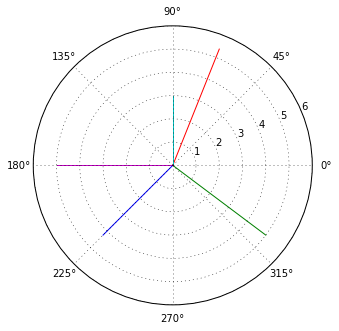

In [13]:
for ix,cn in enumerate(z):
    plt.polar([0,cmath.phase(cn)],[0,abs(cn)])
plt.grid(True)

### Step 7: Complex Conjugates

In [14]:
print "z2 =",z[2]
print "conj(z2) =", z[2].conjugate()
print "abs(z2) =", abs(z[2])
print "abs(z2)^2 =", abs(z[2])**2
print "conj(z)*z =",z[2]*z[2].conjugate()

z2 = (2+5j)
conj(z2) = (2-5j)
abs(z2) = 5.38516480713
abs(z2)^2 = 29.0
conj(z)*z = (29+0j)


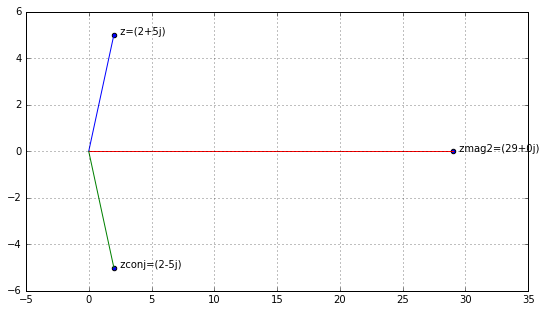

In [15]:
plot_complex(z[2],'')
plot_complex(z[2].conjugate(),'conj')
plot_complex(z[2].conjugate()*z[2],'mag2')
plt.grid(True)

### Step 8: Adding interactivity to complex addition
First, we import the ipython interaction modules.

In [16]:
from IPython.html.widgets import interactive
from IPython.display import display

/Users/bob/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### Step 9: Define printing fuction
Function has four arguments that have specificed default values.

In [17]:
def add_complex(z1_real=1,
                z1_imag=2,
                z2_real=-3,
                z2_imag=-1.5):
    z1 = z1_real + 1j*z1_imag
    z2 = z2_real + 1j*z2_imag
    z_add = z1+z2
    plot_complex(z1,'1')
    plot_complex(z2,'2')
    plot_complex(z_add,'add')
    plt.grid(True)
    plt.axis([-6,6,-6,6])

### Step 10: Call function to make sure it works

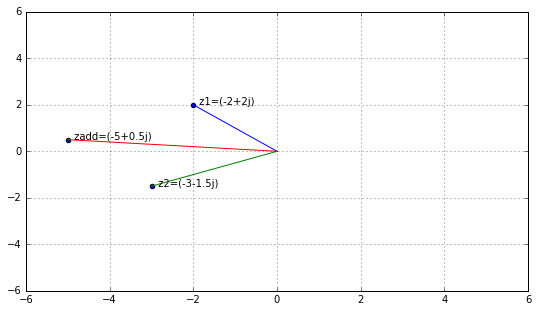

In [20]:
add_complex(-2)

### Step 11: Add interactivity

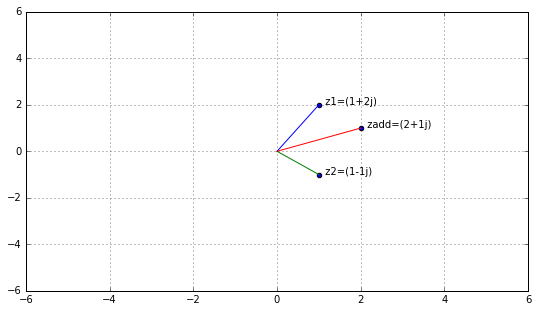

In [21]:
interactive(add_complex,z1_real=(-3,3,.01),z1_imag=(-3,3),z2_real=(-3,3),z2_imag=(-3,3))

### Step 12: Complex Sinusoids
The previous cells manipulate complex values.  In operating with communications signals, we end up dealing with complex-valued, function of time.  For instance, $x(t) = Ae^{j \omega t}$ is a "complex sinusoid". Let's experiment.  

In the plot below, `x` is the complex sinusoid.  According to Euler's rule, the real part (blue line) is $\cos(\omega t)$ and the imaginary part (red line) is $\sin(\omega t)$.  


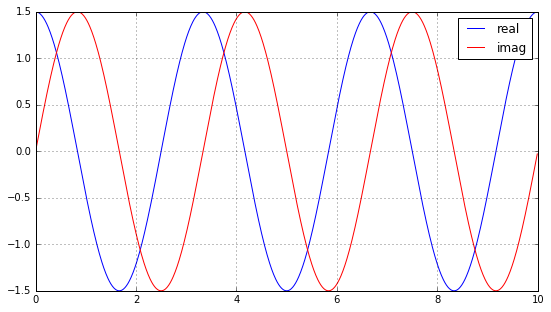

In [24]:
omega = .6*cmath.pi
A = 1.5
t_range = np.arange(0,10,.01)
x = A*np.exp(1j*omega*t_range)
plt.plot(t_range,x.real,label='real');
plt.plot(t_range,x.imag,color='r',label='imag');
plt.grid(True)
plt.legend();

### Step 13: Complex sinusiod in time

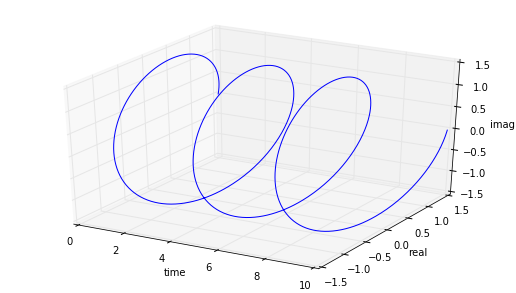

In [25]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t_range,x.real,zs=x.imag);
ax.set_xlabel('time');
ax.set_ylabel('real');
ax.set_zlabel('imag');

### Step 14: Complex sinusiod in time

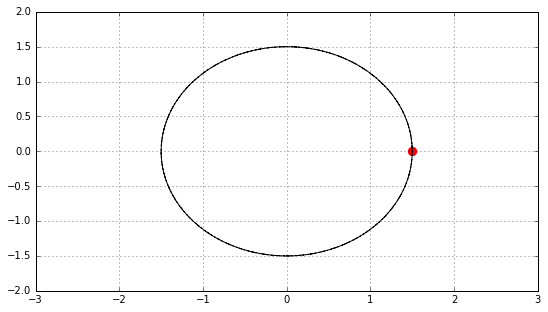

In [26]:
def plot_z(t=0,f=.6,A=1.5):
    omega = f*cmath.pi
    t_range = np.arange(0,10,.01)
    
    x_t = A*np.exp(1j*omega*t)
    plt.scatter(x_t.real,x_t.imag,color='r',s=70)
    
    x = A*np.exp(1j*omega*t_range)
    plt.plot(x.real,x.imag,color='k',ls='--');
    plt.grid(True)
    plt.axis([-3,3,-2,2])
    

interactive(plot_z,t=(0,10,.01),f=(.1,5),A=(.5,2))

In [ ]:
!ls